In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylorentz import Momentum4
import itertools
from iminuit import cost, Minuit
from probfit.pdf import doublecrystalball
from matplotlib import pyplot as plt
from scipy.stats import expon
from scipy.optimize import minimize
top_mass = 173000

signal_region = [120000, 129000]
signal_expected_cat1 = 17.49
background_expected_cat1 = 128.27

signal_expected_cat2 = 28.05
background_expected_cat2 = 611.51


In [301]:
signal_sc = pd.read_csv("signal_cat.csv")
background_sc = pd.read_csv("background_cat.csv")
data_sc = pd.read_csv("data_cat.csv")



In [302]:
signal_cat1 = signal_sc[signal_sc["category"] == 1]
background_cat1 = background_sc[background_sc["category"] == 1]

signal_cat2 = signal_sc[signal_sc["category"] == 2]
background_cat2 = background_sc[background_sc["category"] == 2]

data_cat1 = data_sc[data_sc["category"] == 1]

data_cat2 = data_sc[data_sc["category"] == 2]


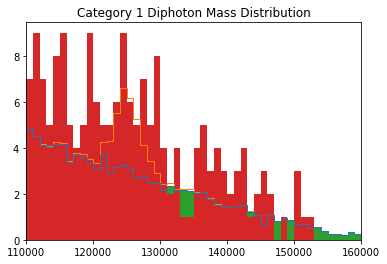

In [303]:
norm_signal_cat1 = np.full(len(signal_cat1), signal_expected_cat1/len(signal_cat1))
norm_background_cat1 = np.full(len(background_cat1), background_expected_cat1/len(background_cat1))
plt.hist([background_cat1["myy"], signal_cat1["myy"]], bins = 50, range = (110000, 160000), stacked= True, weights= [norm_background_cat1, norm_signal_cat1], histtype='step')
bkgd_cat1_hist, bkgd_cat1_edges, n = plt.hist(background_cat1["myy"], bins = 50, range = (110000, 160000), weights = norm_background_cat1, histtype = "bar")

data_cat1_hist, data_cat1_edges, n = plt.hist(data_cat1["myy"], bins = 50, range = (110000, 160000), histtype = "bar")
plt.xlim(110000, 160000)

plt.title("Category 1 Diphoton Mass Distribution")
plt.show()

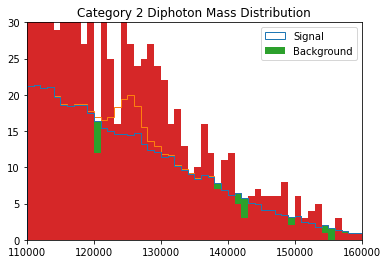

In [304]:
norm_signal_cat2 = np.full(len(signal_cat2), signal_expected_cat2/len(signal_cat2))
norm_background_cat2 = np.full(len(background_cat2), background_expected_cat2/len(background_cat2))
plt.hist([background_cat2["myy"], signal_cat2["myy"]], bins = 50, range = (110000, 160000), stacked= True, weights= [norm_background_cat2, norm_signal_cat2], histtype='step', label= "Signal")
bkgd_cat2_hist, bkgd_cat2_edges, m =plt.hist(background_cat2["myy"], bins = 50, range = (110000, 160000), weights = norm_background_cat2, histtype = "bar", label = "Background")
data_cat2_hist, data_cat2_edges, m = plt.hist(data_cat2["myy"], bins = 50, range = (110000, 160000), histtype = "bar")
plt.xlim(110000, 160000)
plt.ylim(0, 30)
plt.legend()
plt.title("Category 2 Diphoton Mass Distribution")
plt.show()

Rescaling bakcground!

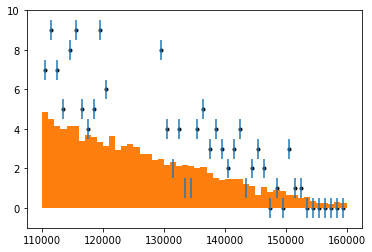

In [305]:
data_cat1_x = np.array([0.5*(data_cat1_edges[i] + data_cat1_edges[i+1]) for i in range(len(data_cat1_hist))])

data_cat1_hist_masked = [data_cat1_hist[i] for i in range(len(data_cat1_hist)) if (data_cat1_x[i]<= 121000 or data_cat1_x[i] >= 129000)]
bkgd_cat1_hist_masked = [bkgd_cat1_hist[i] for i in range(len(data_cat1_hist)) if (data_cat1_x[i]<= 121000 or data_cat1_x[i] >= 129000)]
data_cat1_x_masked = [data_cat1_x[i] for i in range(len(data_cat1_x)) if (data_cat1_x[i]<= 121000 or data_cat1_x[i] >= 129000)]
plt.scatter(data_cat1_x_masked, data_cat1_hist_masked, marker = ".", color = "black")
plt.errorbar(data_cat1_x_masked, data_cat1_hist_masked, xerr= None, yerr = 0.5, ls='none')
plt.hist(background_cat1["myy"], bins = 50, range = (110000, 160000), weights = norm_background_cat1, histtype = "bar")
plt.show()

In [306]:
def minimize_std_cat1(scale):
    bkgd = [scale * i for i in bkgd_cat1_hist_masked]
    deviations = [(bkgd[i]- data_cat1_hist_masked[i])**2 for i in range(len(bkgd))]
    return np.sqrt(np.sum(deviations)/len(bkgd))
    
scale_cat1 = minimize(minimize_std_cat1,x0 = 1)
scale_cat1 = scale_cat1.x[0]
scale_cat1
    

1.7155052391421954

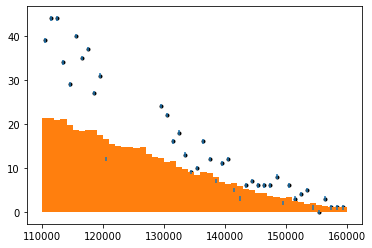

In [307]:
data_cat2_x = np.array([0.5*(data_cat2_edges[i] + data_cat2_edges[i+1]) for i in range(len(data_cat2_hist))])

data_cat2_hist_masked = [data_cat2_hist[i] for i in range(len(data_cat2_hist)) if (data_cat2_x[i]<= 121000 or data_cat2_x[i] >= 129000)]
bkgd_cat2_hist_masked = [bkgd_cat2_hist[i] for i in range(len(data_cat2_hist)) if (data_cat2_x[i]<= 121000 or data_cat2_x[i] >= 129000)]
data_cat2_x_masked = [data_cat2_x[i] for i in range(len(data_cat2_x)) if (data_cat2_x[i]<= 121000 or data_cat2_x[i] >= 129000)]
plt.scatter(data_cat2_x_masked, data_cat2_hist_masked, marker = ".", color = "black")
plt.errorbar(data_cat2_x_masked, data_cat2_hist_masked, xerr= None, yerr = 0.5, ls='none')
plt.hist(background_cat2["myy"], bins = 50, range = (110000, 160000), weights = norm_background_cat2, histtype = "bar")
plt.show()

In [308]:
def minimize_std_cat2(scale):
    bkgd = [scale * i for i in bkgd_cat2_hist_masked]
    deviations = [(bkgd[i]- data_cat2_hist_masked[i])**2 for i in range(len(bkgd))]
    return np.sqrt(np.sum(deviations)/len(bkgd))
    
scale_cat2 = minimize(minimize_std_cat2,x0 = 1)
scale_cat2 = scale_cat2.x[0]
scale_cat2

1.6991361340325026

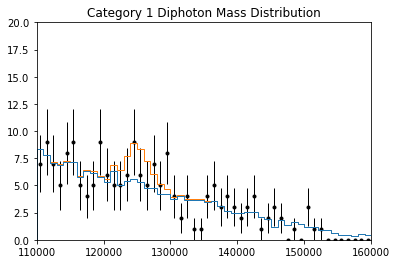

In [309]:
norm_signal_cat1 = np.full(len(signal_cat1), signal_expected_cat1/len(signal_cat1))
norm_background_cat1 = np.full(len(background_cat1), scale_cat1*background_expected_cat1/len(background_cat1))
data_cat1_hist_err = np.sqrt(np.array(data_cat1_hist))
plt.hist([background_cat1["myy"], signal_cat1["myy"]], bins = 50, range = (110000, 160000), stacked= True, weights= [norm_background_cat1, norm_signal_cat1], histtype='step')
#plt.hist(background_cat1["myy"], bins = 50, range = (110000, 160000), weights = norm_background_cat1, histtype = "bar")
plt.scatter(data_cat1_x, data_cat1_hist, marker = ".", color = "black")
plt.errorbar(data_cat1_x, data_cat1_hist, xerr= None, yerr = data_cat1_hist_err, ls='none', color = "black", elinewidth = 1)
plt.xlim(110000, 160000)
plt.ylim(0, 20)
plt.title("Category 1 Diphoton Mass Distribution")
plt.show()

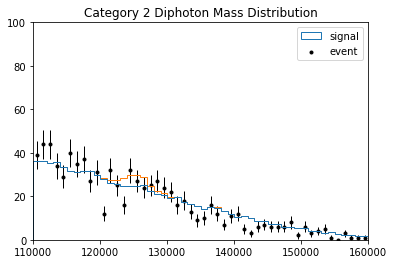

In [310]:
norm_signal_cat2 = np.full(len(signal_cat2), signal_expected_cat2/len(signal_cat2))
norm_background_cat2 = np.full(len(background_cat2), scale_cat2*background_expected_cat2/len(background_cat2))

data_cat2_hist_err = np.sqrt(np.array(data_cat2_hist))
plt.hist([background_cat2["myy"], signal_cat2["myy"]], bins = 50, range = (110000, 160000), stacked= True, weights= [norm_background_cat2, norm_signal_cat2], histtype='step', label = "signal")
#plt.hist(background_cat2["myy"], bins = 50, range = (110000, 160000), weights = norm_background_cat2, histtype = "bar")
plt.scatter(data_cat2_x, data_cat2_hist, marker = ".", color = "black", label = "event")
plt.errorbar(data_cat2_x, data_cat2_hist, xerr= None, yerr = data_cat2_hist_err, ls='none', color = "black", elinewidth= 1)
plt.xlim(110000, 160000)
plt.ylim(0, 100)
plt.legend()
plt.title("Category 2 Diphoton Mass Distribution")
plt.show()

Fitting with DSCR